# Vectorisation Bag of Words (BoW) avec CountVectorizer et classification avec MultinomialNB

In [27]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,Comment puis-je rejoindre Persan à partir de S...,1,0,0,0
1,Je prévois un voyage de VILLEFRANCHE-DE-CONFLE...,1,0,0,0
2,Go from the city of Sarlat La Caneda to Souillac.,0,1,0,0
3,What is the best way to go from Allamps-Esat t...,0,1,0,0
4,zg xqmajyjpfxsvvgycgqd c e i y ehgbcf f e o...,0,0,0,1
...,...,...,...,...,...
1528934,Tom met Mary in the lobby of the building.,0,1,1,0
1528935,Trouve un moyen d'atteindre BÉNING-LÈS-SAINT-A...,1,0,0,0
1528936,"]r.0j>&{TFQpZ(E\]""[$+mFhI/1*'vfL-X0G_x1MY&fn2+...",0,0,0,1
1528937,How long had you been sick before you saw the ...,0,1,1,0


In [28]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


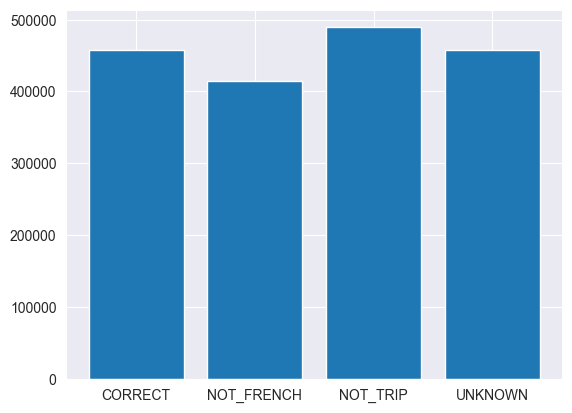

In [29]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Stemming (racinisation)

In [30]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Eliott
[nltk_data]     Clavier\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Eliott
[nltk_data]     Clavier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

stemmer = PorterStemmer()
stop_words = set(stopwords.words('french'))

In [32]:
import re

def stem_text(text: str):
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize the text
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(stemmed_words)

In [33]:
dataset['text'] = dataset['text'].apply(stem_text)

In [34]:
dataset[dataset['CORRECT'] == 1]

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,comment pui rejoindr persan partir saint julie...,1,0,0,0
1,prévoi voyag villefranch conflent epin,1,0,0,0
18,indiqu meilleur chemin gare cerbèr ver boën re...,1,0,0,0
19,a moyen aller aulnoy aymeri pessac,1,0,0,0
20,indiqu trajet plu simpl depui aéroport pont au...,1,0,0,0
...,...,...,...,...,...
1528926,crée itinérair préci houssièr montbrison renco...,1,0,0,0
1528930,prévoi trajet depui oloron saint mari ver rési...,1,0,0,0
1528932,trouv itinérair aller étamp marn hopit haguena...,1,0,0,0
1528933,par hopit limeray ver sisteron,1,0,0,0


# Split du dataset en train, test et validation

In [35]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(611576,) (76447,) (76447,)
(611576, 4) (76447, 4) (76447, 4)


In [36]:
X_train.values

array(['aimerai aller place central valdahon partant place central valdahon',
       'par vill perpignan ver barr',
       'souhait aller aubigni nere mail partant arra comment fair', ...,
       'go to the central squar of creutzwald from the central squar of tend',
       'zq ip a5ynnq q0c vw3 vlbl mo 3lj 5t0nvkcn3 _qkha v nz f4 egk 7 wu 8d',
       'she lucki to have him'], dtype=object)

# Exemple d'utilisation de CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<611576x1285491 sparse matrix of type '<class 'numpy.int64'>'
	with 5590457 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [38]:
v.get_feature_names_out()[100000:100050]

array(['_dljqem', '_dlkqa', '_dll3', '_dlnw5p', '_dlq', '_dlugtli',
       '_dlzamxa', '_dm', '_dm1', '_dmeq6m', '_dmla', '_dmqfi', '_dn',
       '_dnejncgsk', '_dni', '_dnl', '_dnmmdma3x', '_dnsmu',
       '_dnxtsdnlcp', '_do', '_do_', '_do_n', '_doa', '_dod', '_donm',
       '_doo', '_dovkkdpcecnhf', '_doy7ra2', '_dp', '_dp3', '_dp7gj',
       '_dprem3uuqwkugno35x6', '_dpru', '_dpyv', '_dq',
       '_dqldfxne7_yundk', '_dqtdu', '_dqyj', '_dr', '_dr4', '_drnj',
       '_drnsz68', '_drx', '_ds2', '_ds2qcnu', '_ds39', '_ds81',
       '_dsewqk', '_dsfboz', '_dsfu'], dtype=object)

In [39]:
# Number of identified features
v.get_feature_names_out().shape

(1285491,)

In [40]:
v = CountVectorizer()

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<535268x73795 sparse matrix of type '<class 'numpy.int64'>'
	with 4083852 stored elements in Compressed Sparse Row format>

In [41]:
# Number of identified features
v.get_feature_names_out().shape

(73795,)

In [42]:
v.get_feature_names_out()[30000:30050]

array(['hdmi', 'he', 'head', 'headach', 'headdress', 'headlight',
       'headlin', 'headlong', 'headphon', 'headquart', 'headset',
       'headstart', 'headwait', 'heal', 'healer', 'health', 'healthi',
       'healthier', 'heap', 'hear', 'heard', 'hearer', 'hearken',
       'hearsay', 'heart', 'heartbeat', 'heartbreak', 'heartbroken',
       'heartedli', 'heartless', 'heartrend', 'heartwarm', 'heat',
       'heater', 'heathcliff', 'heather', 'heathrow', 'heaven',
       'heavenli', 'heavi', 'heavier', 'heaviest', 'heavili', 'heba',
       'heben', 'hebrew', 'hebron', 'hebräisch', 'hebst', 'hebt'],
      dtype=object)

In [43]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<535268x1937 sparse matrix of type '<class 'numpy.int64'>'
	with 3780599 stored elements in Compressed Sparse Row format>

In [44]:
# Number of identified features
v.get_feature_names_out().shape

(1937,)

In [45]:
v.get_feature_names_out()[::50]

array(['11', 'almenêch', 'arnac', 'babenhausen', 'bettembourg', 'brignai',
       'carrefour', 'chaux', 'comput', 'db', 'dive', 'ein', 'everyth',
       'for', 'giorno', 'hasn', 'hôpital', 'jourdain', 'lavorar',
       'lorient', 'make', 'menton', 'montbrison', 'mâle', 'noth',
       'paimpol', 'peux', 'poêl', 'rain', 'roi', 'saumur', 'sinc',
       'studi', 'them', 'touët', 'vado', 'vienn', 'welt', 'yanni'],
      dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [47]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.81      1.00      0.89     22988
  NOT_FRENCH       0.99      1.00      0.99     20618
    NOT_TRIP       0.95      0.82      0.88     24439
     UNKNOWN       1.00      0.99      1.00     22888

   micro avg       0.93      0.95      0.94     90933
   macro avg       0.94      0.95      0.94     90933
weighted avg       0.94      0.95      0.94     90933
 samples avg       0.93      0.94      0.93     90933


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

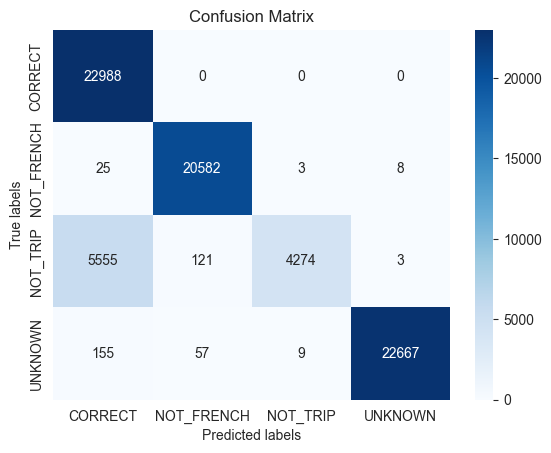

In [49]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

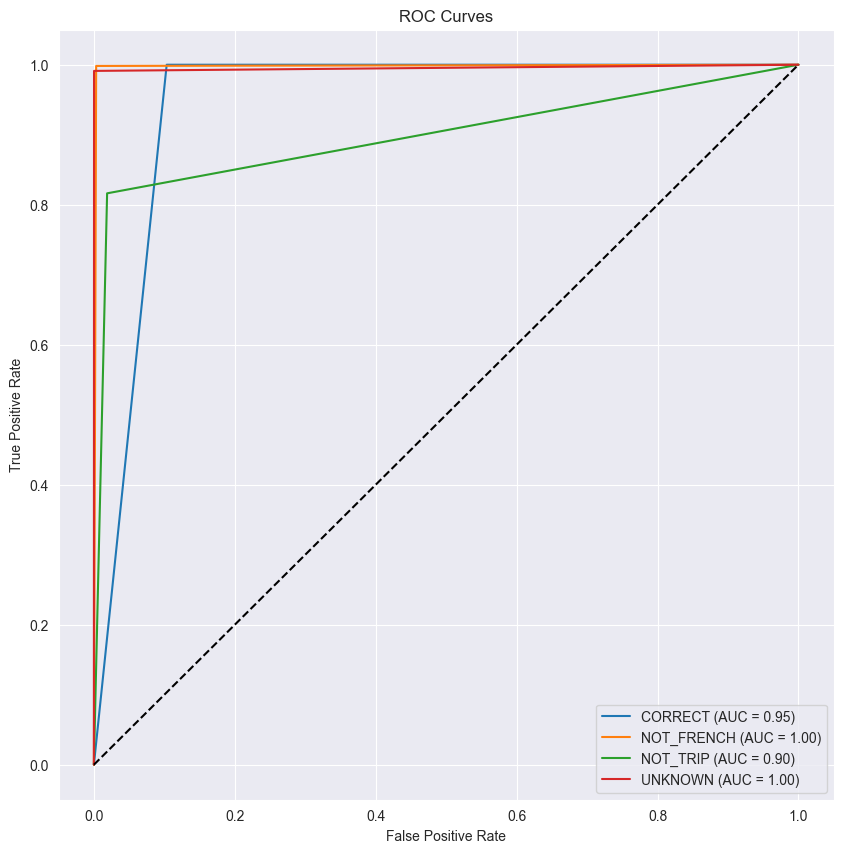

In [50]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [51]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 99.3%
 - UNKNOWN => 0.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 99.9%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 99.5%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 39.3%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 29.3%
 - NOT_FRENCH => 60.3%
 - NOT_TRIP => 67.8%
 - UNKNOWN => 21.9%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 31.2%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 11.1%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 29.9%
 - NOT_FRENCH => 27.1%
 - NOT_TRIP => 32.0%
 - UNKNOWN => 30.0%

* Dirige moi vers Lyon depuis Saint-

# La performance du modèle semble équivalent à la version avec seulement les stops words. Cependant, le modèle semble plus serein sur les pourcentages de confiance pour chaque label (beaucoup plus de 100% pour le label à prédire) et de 0% pour les autres labels).

In [52]:
# print few predictions from test dataset where classifier failed
for i in range(len(y_test)):
    if (y_test.values[i] != y_pred[i]).any():
        print(X_test.values[i])
        print("True labels:", [id2label[i] for i, label in enumerate(y_test.values[i]) if label == 1])
        print("Predicted labels:", [id2label[i] for i, label in enumerate(y_pred[i]) if label == 1])
        print()

monsempron libo ver hopit monsempron libo
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

trouv moyen atteindr vitr
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

head toward saint julien villa from the central squar of montlucon
True labels: ['NOT_FRENCH']
Predicted labels: ['NOT_FRENCH', 'NOT_TRIP']

train planifi départ aéroport ste mari ms théâtre
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT', 'NOT_TRIP']

basel anceni
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

tom enthousiasmé
True labels: ['NOT_TRIP']
Predicted labels: ['NOT_FRENCH', 'NOT_TRIP']

par commentri aller vill commentri
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

place central lamur azergu corbigni
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

comment partir st pierr chandieu r
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

aimerai aller gare nogent rotrou partant gare nogent rotrou
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

comme